## 航空宇宙情報システム学第二

<h1><center> 第5回 線形最小二乗法（線形回帰） </center> </h1>

<center>

2023年5月9日

担当教員: 矢入健久

e-mail: yairi@g.ecc.u-tokyo.ac.jp
</center>


## はじめに
* 今回は、データ解析の基本のひとつである、最小二乗法による線形回帰(linear regression)を学びたいと思います。
* この授業の最初に紹介した Numpy (の行列ベクトル演算機能)が威力を発揮します。
* 前回話をしたPandasも使います。
* ~~統計学における基本的な考え方である最尤法と最小二乗法との関係についても言及します。~~


## 曲線当てはめ(Curve Fitting)／回帰(Regression)問題

$N$個のデータ点 $(x_0,y_0),(x_1,y_1),\cdots,(x_{N-1},y_{N-1})$があるとき、このデータにできるだけ良く当てはまるような関数 $y=f_\boldsymbol{\alpha}(x)$を求めたいとします。
* ここで、$\boldsymbol{\alpha}$は関数のパラメータを表します。一般にベクトルです。$y=f(x;\boldsymbol{\alpha})$のように書く場合もあります。
* $x$(またはベクトル$\boldsymbol{x}$)のことを、<font color="blue">説明変数(explanatory variable(s))</font>、独立変数、などと呼びます。（機械学習では、特徴量という言葉もよく使います。）
* $y$のことを、<font color="blue">目標変数(target variable)</font>、目的変数、応答変数、従属変数、などと呼びます。
* <font color="blue">当てはまりの良し悪しを判断する基準</font>を定義して、最善のパラメータ値$\hat{\boldsymbol{\alpha}}$を求めます。

<img src="https://drive.google.com/uc?export=view&id=1X_lMJVlMw2CxuZ_yZsLTLzu31_pxiLKW" width="300"/>

* このような問題はモデルとデータを扱う様々な分野に存在し、曲線当てはめ(curve fitting)と呼ばれていますが、特に統計、多変量解析、機械学習では、<font color="blue">回帰(regression)</font>と呼ばれており、この授業でも以降は回帰という言葉を使おうと思います。
* 曲線当てはめは、**補間(interpolation)**と似ていますが、与えられた点を通る必要が無い点、言い換えれば、点として与えられているデータサンプルに誤差が含まれていることを前提としている点が異なります。


## 最小二乗法(least squares method)
* 最小二乗法による回帰・曲線当てはめでは、データへの当てはまりの良し悪しを評価する基準として、次式で表される<font color="red">残差二乗和</font>を用い、これが最も小さくなるようなパラメターの値$\hat{\boldsymbol{\alpha}}$を求めようとします。
$$
Q(\boldsymbol{\alpha}) = \sum_{i=0}^{N-1} (\underbrace{y_i}_{実際のyの値} - \underbrace{f_\boldsymbol{\alpha}(x_i)}_{関数fによるyの予測値} )^2
= \left(y_0 - f_\boldsymbol{\alpha}(x_0) \right)^2 + \left(y_1 - f_\boldsymbol{\alpha}(x_1) \right)^2 + \cdots + \left(y_{N-1} - f_\boldsymbol{\alpha}(x_{N-1}) \right)^2 \tag{Eq.5-1}
$$
* 関数$f_{\boldsymbol{\alpha}}(x)$が、<font color="blue">パラメータ$\boldsymbol{\alpha}$に関して線形である場合を、線形最小二乗法</font>と呼びます。<font color="red">$x$について線形か非線形かは関係ない</font>ことに気をつけてください。
* 一方、関数$f_{\boldsymbol{\alpha}}(x)$が、パラメータ$\boldsymbol{\alpha}$に関して非線形である場合を、非線形最小二乗法と呼びます。
* 当然ですが、線形な最小二乗法の方が非線形な場合よりも簡単なので、今日は線形な場合に焦点を当てます。(後日の授業で、非線形最小二乗法も少し扱う予定です。)


## 線形最小二乗法(Linear Least Squares)
*  前述のように、関数$f_{\boldsymbol{\alpha}}(\boldsymbol{x})$が、<font color="blue">パラメータ$\boldsymbol{\alpha}=[\alpha_0,\alpha_1,\cdots,\alpha_K]^\top$に関して線形</font>だとします。
  * 今まで、$x$をスカラーとして扱っていましたが、ベクトルに一般化して$\boldsymbol{x}$と書くことにします。
* $\boldsymbol{\alpha}$について線形ということは、関数$f_{\boldsymbol{\alpha}}(\boldsymbol{x})$は、次のように書き直すことができるということです。
$$
f_{\boldsymbol{\alpha}}(\boldsymbol{x}) = \alpha_0 \cdot f_0(\boldsymbol{x}) + \alpha_1 \cdot f_1(\boldsymbol{x}) + \cdots \alpha_K \cdot f_K(\boldsymbol{x}) \tag{Eq.5-2}
$$
  * ここで、<font color="blue">$f_0(\boldsymbol{x}),f_1(\boldsymbol{x}),\cdots,f_K(\boldsymbol{x})$は既知の関数で、基底関数</font>と呼ばれます。
  * つまり、線形の曲線当てはめは、<font color="blue">基底関数群の線形和によって未知関数を表す</font>ということです。
  * しつこいですが、勘違いしやすいので繰り返しますが、変数$\boldsymbol{x}$については非線形でも構いません。
* (例1) 1変数の$K$次多項式:
$$
f_{\boldsymbol{\alpha}}(x) = \alpha_0 \cdot 1 + \alpha_1 \cdot x + \alpha_2 \cdot x^2 +\cdots + \alpha_K \cdot x^K = \sum_{k=0}^K \alpha_k \cdot x^k \tag{Eq.5-3}
$$
* (例2) フーリエ級数:
$$
f_{\boldsymbol{\alpha}}(x) = \frac{\alpha_0}{2} + \sum_{k=1}^{\infty} \left( a_k \cos kx + b_k \sin kx \right) \tag{Eq.5-4}
$$
* どちら例でも、関数$f_{\boldsymbol{\alpha}}(x)$が、$\boldsymbol{\alpha}$に関して線形、既知の基底関数の線形和になっています。

## 線形最小二乗法 1 : 単回帰

まず、最も基本的な回帰問題として、単回帰問題から見ていきます。
* <font color="red">入力変数(説明変数)$x$は一次元(スカラー)</font>。
* 関数$f_\boldsymbol{\alpha}(x)$は$x$の一次関数です。つまり、
$$
y = f_\boldsymbol{\alpha}(x) = \alpha_0 \cdot 1 + \alpha_1 \cdot x \tag{Eq.5-5}
$$
* 要するに、単回帰は、2次元の点群を<font color="red">直線近似</font>することと同じです。つまり、$\alpha_0$は直線の切片、$\alpha_1$は傾きを表します。

単回帰では、(Eq.5-1)に(Eq.5-5)を代入することにより、残差二乗和は次式のようになることが分かります。
$$
Q(\alpha_0,\alpha_1) = \sum_{i=0}^{n-1} \left( y_i - (a_0 + a_1 x_i) \right)^2 \tag{Eq.5-6}
$$

最小二乗法では、これを最小化するような切片$\alpha_0$と傾き$\alpha_1$を求めます。これを視覚的に説明したのが、下の図になります。

<img src="https://drive.google.com/uc?export=view&id=1y72B3fSvieTKQebLbtOosaYeTpJF2nrx" width="700"/>

実際に、(Eq.5-6)の残差二乗和を最小化するにはどうしたら良いでしょうか？
一般に、<font color="red">関数$f(\boldsymbol{x})$が$\boldsymbol{x}=\hat{\boldsymbol{x}}$において極値を取るためには、$\hat{\boldsymbol{x}}$が関数$f(\boldsymbol{x})$の停留点、すなわち、$\nabla f(\hat{\boldsymbol{x}})=\boldsymbol{0}$</font> でなければなりません。一般には、これは必要条件であって十分条件ではないですが、(Eq.5-1)の形式で表される<font color="blue">残差二乗和の場合は、停留点において最小値を取る</font>ことが保証されます。

そこで、(Eq.5-6)の右辺を$\alpha_0, \alpha_1$でそれぞれ偏微分してゼロと置き、残差$Q$の$\boldsymbol{\alpha}$についての勾配がゼロになる条件を探します。
$$
\begin{align}
\frac{\partial Q}{\partial \alpha_0} &= -2 \sum_{i=0}^{n-1} \left(y_i - a_0 - a_1 x_i \right) = 0 \\
\frac{\partial Q}{\partial \alpha_1} &= -2 \sum_{i=0}^{n-1} x_i\left(y_i - a_0 - a_1 x_i \right) = 0 \\
\end{align}
$$
この連立方程式を整理すると、次のように行列・ベクトルを使って書き直すことができます。
$$
\left[\begin{matrix}
n & \sum_i x_i \\
\sum_i x_i & \sum_i x^2_i
\end{matrix}\right]
\left[\begin{matrix}
\alpha_0 \\
\alpha_1
\end{matrix}\right]
=
\left[\begin{matrix}
\sum_i y_i \\
\sum_i x_i y_i
\end{matrix}\right] \tag{Eq.5-7}
$$
この連立一次方程式(「正規方程式」と呼びます)を解けば、単回帰の最小二乗法の解$(\hat{\alpha}_0,\hat{\alpha}_1)$が求まります。ここで、
$$
\boldsymbol{S}_{xx} =
\left[\begin{matrix}
n & \sum_i x_i \\
\sum_i x_i & \sum_i x^2_i
\end{matrix}\right],\hspace{5mm}
\boldsymbol{\alpha} =
\left[\begin{matrix}
\alpha_0 \\
\alpha_1
\end{matrix}\right],\hspace{5mm}
\boldsymbol{s}_{xy} =
\left[\begin{matrix}
\sum_i y_i \\
\sum_i x_i y_i
\end{matrix}\right]
$$
と置けば、この方程式は、
$$
\boldsymbol{S}_{xx} \boldsymbol{\alpha} = \boldsymbol{s}_{xy} \tag{Eq.5-8}
$$
と書けるので、
$$
\hat{\boldsymbol{\alpha}} =  \boldsymbol{S}_{xx}^{-1} \boldsymbol{s}_{xy} \tag{Eq.5-9}
$$
となります。ただし、実際にNumpy等で計算するときには、逆行列$\boldsymbol{S}_{xx}^{-1}$を、`numpy.linalg.inv`関数で求めるよりも、方程式をそのまま`numpy.linalg.solve`関数で解く方が良いとされています。


### 単回帰 (直線あてはめ)の例題

**(例題)** $n=5$個のサンプル$\{(x_i,y_i)\}$ ($i=0,1,\cdots,4$)から成るデータ : $(1.7,0.6),(3.4,6.8),(6.1,4.8),(6.9,12.0),(9.2,24.9)$
に対して、最小二乗法で直線当てはめを行ってください。

---

まず、与えられた5つのサンプル(点)から成るデータの散布図を描いてみます。

Text(0, 0.5, 'y')

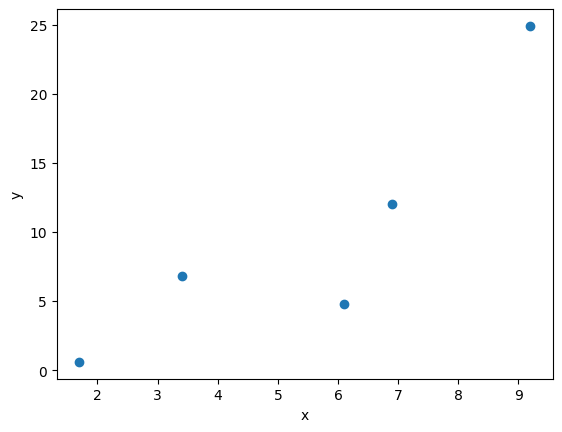

In [ ]:
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt
# x データ
x = np.array([1.7, 3.4, 6.1, 6.9, 9.2])
# y データ
y = np.array([0.6, 6.8, 4.8, 12.0, 24.9])
# データ点数
n = len(x)
# プロットしてみる
plt.scatter(x,y)
plt.xlabel('x')
plt.ylabel('y')

確かに、直線で近似できそうです。

次に、(Eq.5-7),(Eq.5-8)の
連立方程式に含まれる係数行列$\boldsymbol{S}_{xx}$と定数ベクトル$\boldsymbol{s}_{xx}$を定義式に従って作成し、numpyの一時連立方程式解法関数 `solve`で近似直線の傾き($\alpha_1$)と切片($\alpha_0$)を求めてみます。

In [ ]:
# 係数行列
Sxx = np.array([[n,np.sum(x)],[np.sum(x),np.sum(x*x)]])
# 定数ベクトル
sxy = np.array([np.sum(y),np.sum(x*y)])

print("Sxx=",Sxx)
print("sxx=",sxy)

# 連立方程式を解く
alp = la.solve(Sxx,sxy)
#alp = np.dot(la.inv(Sxx),sxy) #でも同じですが、逆行列はなるべく計算しない方が良い
print("alphahat=",alp)

Sxx= [[  5.    27.3 ]
 [ 27.3  183.91]]
sxx= [ 49.1 365.3]
alphahat= [-5.40978423  2.78933777]


求まった直線を散布図の中に描いて、当てはまり具合を確かめてみます。

[-0.66791002  4.07396419 11.60517617 13.83664639 20.25212326]


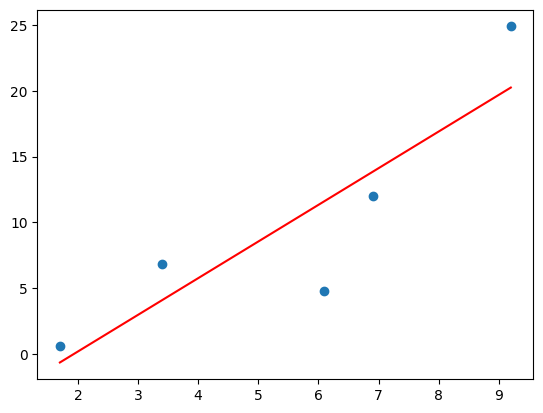

In [ ]:
# 近似直線を使って、yの値を復元
yhat = alp[0] + alp[1]*x
print(yhat)
plt.scatter(x,y)
plt.plot(x,yhat,'r-')

上の例では、正規方程式の中の行列$\boldsymbol{S}_{xx}$とベクトル$\boldsymbol{s}_{xy}$を
```
# 係数行列
Sxx = np.array([[n,np.sum(x)],[np.sum(x),np.sum(x**2)]])
# 定数ベクトル
sxy = np.array([np.sum(y),np.sum(x*y)])
```
のように求めていますが、行列とベクトルを使ってもう少しスマート(?)に求める方法があります。

今、行列$\boldsymbol{X}$, ベクトル$\boldsymbol{y}$をそれぞれ、
$$
\boldsymbol{X} =
\left[\begin{matrix}
1 & x_0 \\
1 & x_1 \\
\vdots & \vdots \\
1 & x_{n-1}
\end{matrix}\right]
,\hspace{5mm}
\boldsymbol{y} =
\left[\begin{matrix}
y_0 \\
y_1 \\
\vdots \\
y_{n-1}
\end{matrix}\right] \tag{Eq.5-10}
$$
のように定義します。<font color="red">行列$\boldsymbol{X}$の最左列は全ての値が1</font>です。これは、直線の切片$\alpha_0$を求めるために必要です。
すると、先程の行列$\boldsymbol{S}_{xx}$とベクトル$\boldsymbol{s}_{xy}$は、それぞれ、
$$
\boldsymbol{S}_{xx} = \boldsymbol{X}^\top \boldsymbol{X},\hspace{10mm}
\boldsymbol{s}_{xy} = \boldsymbol{X}^\top \boldsymbol{y},\hspace{10mm}
\tag{Eq.5-11}
$$
と書ける(確かめてみてください)ので、(Eq.5-8)の正規方程式は、
$$
\boldsymbol{X}^\top \boldsymbol{X} \boldsymbol{\alpha}
= \boldsymbol{X}^\top \boldsymbol{y} \tag{Eq.5-12}
$$
と書き直すことができ、これを解くことによって、最小二乗法の解は、
$$
\hat{\boldsymbol{\alpha}}
= \boldsymbol{S}_{xx}^{-1} \boldsymbol{s}_{xy}
= \left(\boldsymbol{X}^\top \boldsymbol{X}  \right)^{-1} \boldsymbol{X}^\top \boldsymbol{y} \tag{Eq.5-13}
$$
となります。このやり方で求めているのが、次のコードです。当前ですが、答えは同じになります。

In [ ]:
# x の左隣に全部1の列ベクトルを付け足した行列
X = np.stack((np.ones(n),x),1)
# 係数行列 np.dot(X.T,X) , 定数ベクトル np.dot(X.T,y)
alp = la.solve(np.dot(X.T,X),np.dot(X.T,y))
print(alp)

[-5.40978423  2.78933777]


なお、実はNumpy には線形最小二乗法を解く関数 `numpy.linalg.lstsq` が用意されていて、これを使えば、自分で正規方程式を作る必要はありません。
  * `rcond=None`というオプション引数を入れないとワーニングが少しうるさいです。
  * `lstsq`関数は、他にもいろいろなものをタプルで戻り値を返すので、下の例では、最初の要素として返される係数ベクトルだけを取り出して表示させています。


In [ ]:
sol = la.lstsq(X,y,rcond=None)
alp = sol[0]
print(alp)
print(sol)

[-5.40978423  2.78933777]
(array([-5.40978423,  2.78933777]), array([80.32531792]), 2, array([13.71068931,  0.96280772]))


ほぼ自明ではありますが、$\hat{\boldsymbol{\alpha}}$が本当に残差二乗和$Q(\boldsymbol{\alpha})$の最小値を与えるかどうかを検証してみます。

具体的には、$\hat{\boldsymbol{\alpha}}=\left[\hat{\alpha_0} , \hat{\alpha_1} \right]$の周辺で、$\alpha_0$のみ、あるいは、$\alpha_1$のみを動かしたときに、それぞれ、$\alpha_0=\hat{\alpha_0}$ , $\alpha_1=\hat{\alpha_1}$ で極小値を取っているかどうかを見ます。

Text(0, 0.5, 'Q')

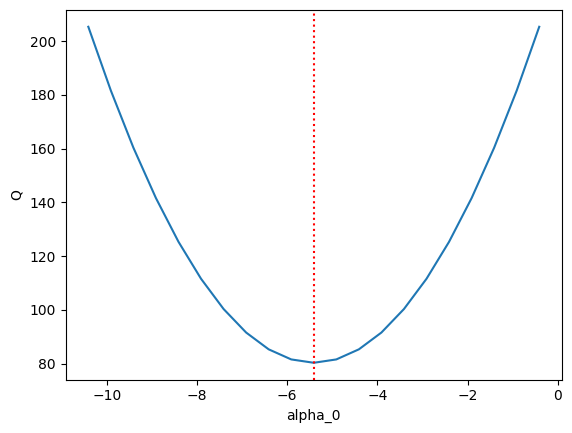

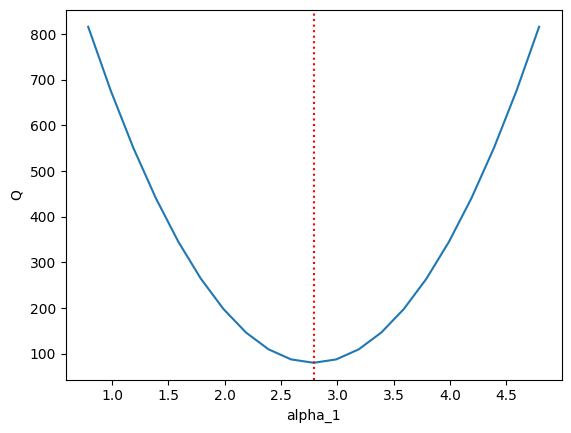

In [ ]:
#　与えられた alpha_0, alpha_1 に対して、残差二乗和を計算
def qval(a0,a1):
  alp = np.array([a0,a1])
  yh = np.dot(X,alp)
  e = y - yh
  return np.sum(e**2)

# alpha_0（切片） について、\hat{alpha_0} の周りでQの値を求める
a0rng = np.linspace(alp[0]-5.0,alp[0]+5.0,21)
qrng0 = np.array([qval(a0,alp[1]) for a0 in a0rng])
plt.plot(a0rng,qrng0)
plt.axvline(x=alp[0],ls=":",c="r")
plt.xlabel("alpha_0")
plt.ylabel("Q")

# alpha_1（傾き） について、\hat{alpha_1} の周りでQの値を求める
plt.figure() # 新しいfigureを作る
a1rng = np.linspace(alp[1]-2.0,alp[1]+2.0,21)
qrng1 = np.array([qval(alp[0],a1) for a1 in a1rng])
plt.plot(a1rng,qrng1)
plt.axvline(x=alp[1],ls=":",c="r")
plt.xlabel("alpha_1")
plt.ylabel("Q")

## [例題]ココア消費量とノーベル賞受賞者数
* 10年くらい前に少し話題になったニュースを例題にしてみます。オリジナルソースは、

 H Messerli, Franz. (2012). Chocolate Consumption, Cognitive Function, and Nobel Laureates. The New England journal of medicine. 367. 1562-4. 10.1056/NEJMon1211064.

 という一流雑誌に掲載された論文(正確には正規の「論文」ではなく「記事」という扱いですが。)です。
* 論文の概要: チョコレートには認知機能を改善する効果があると言われている。
そこで、（1人あたりの）<font color="red">チョコレート消費量と、国民10万人あたりのノーベル賞受賞者数との間に相関関係があるかどうか</font>を調べてみた。
*<font color="red"> (注意) 相関関係と因果関係とを混同しないように</font> 。

* 国別の国民一人当たりのチョコレート消費量についてのまとまったデータが見つからなかったので、ここでは<font color="red">ココア消費量のデータで代用</font>します。
* データの出典は以下になります。
  * http://onegoldenticket.blogspot.com/2013/01/chocolate-consumption-statistics-by.html
  * https://en.wikipedia.org/wiki/Nobel_laureates_per_capita


データファイル `cocoa-nobel.csv` ファイルは、
 (Google ドライブの)マイドライブにファイルを置き、ドライブをマウントしておきます。

 そして、前回紹介したPandas のインポート機能を使ってCSVファイルからデータフレームにデータを読み込みます。先頭列(国名)をインデクス列とします。




In [ ]:
import pandas as pd
df1 = pd.read_csv('/content/drive/My Drive/cocoa-nobel.csv',index_col=0)
display(df1)

,Cocoa Consumption,Nobel Laureates
Country,,
Switzerland,5.88,29.728
Belgium,5.69,8.850
Norway,4.02,24.503
Ireland,4.02,14.701
Germany,3.96,13.031
Austria,3.80,24.040
United Kingdom,3.64,19.945
France,3.62,11.741
Denmark,3.29,22.516


前回説明したように、`df1['Cocoa Consumption']`と`df1['Nobel Laureates']`で、それぞれ、ココア消費量の列とノーベル賞受賞者数の列を取り出すことが出来るので、Matplotlibで散布図は、以下のようにして書くことができます。

Text(0, 0.5, 'Nobel Laureates')

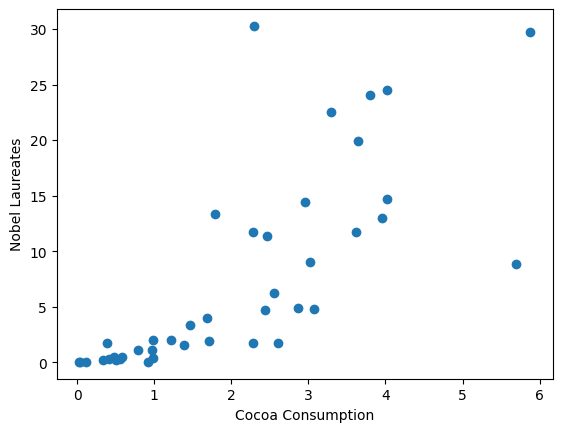

In [ ]:
plt.scatter(df1['Cocoa Consumption'],df1['Nobel Laureates'])
plt.xlabel(df1.columns[0]) # 'Cocoa Consumption'
plt.ylabel(df1.columns[1]) # 'Nobel Laureates'

ちなみに、Matplotlib(pyplot) の`text()`関数を使って、各点の「国名」を表示させることもできますが、このデータの場合、点が密集していて（特に左下）が見づらいです。

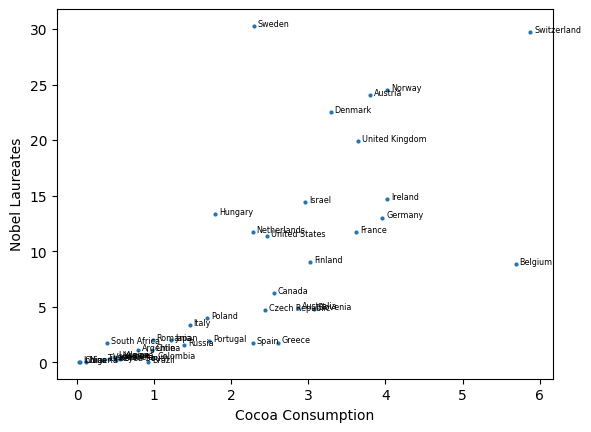

In [ ]:
plt.scatter(df1.iloc[:,0],df1.iloc[:,1],s=4)
plt.xlabel(df1.columns[0]) # 'Cocoa Consumption'
plt.ylabel(df1.columns[1]) # 'Nobel Laureates'
for i in range(len(df1.index)):
  plt.text(df1.iloc[i,0]+0.05,df1.iloc[i,1],df1.index[i],fontsize="xx-small")

国別の「一人あたりのココア消費量」と「単位人口あたりのノーベル賞受賞者数」とをプロットした散布図を眺めると、確かに正の相関があるように見えます。

そこで、実際に<font color="red">相関係数</font>を求めてみます。
相関係数$r$は、以下の式で計算されます。
$$
r = \frac{s_{xy}}{s_x \cdot s_y}
= \frac{\sum_i (x_i - \bar{x})(y_i - \bar{y})}{\sqrt{\sum_i (x_i - \bar{x})^2} \cdot \sqrt{\sum_i (y_i - \bar{y})^2}}
$$
ただし、$\bar{x}$,$\bar{y}$はそれぞれ$x$,$y$の平均値を表します。
この式に従って計算したのが、次のコードです。

前回紹介し忘れていたのですが、<font color="blue">Pandasのデータフレームまたはシリーズの`values`属性を使えば、Numpyのarray型オブジェクト(行列またはベクトル)がすぐに得られます</font>。

In [ ]:
# ココア消費量
x = df1.iloc[:,0].values
# ノーベル受賞者数
y = df1.iloc[:,1].values
# 相関係数の定義に従って、自分で計算
# x,yの平均
mx,my = np.mean(x),np.mean(y)
# x,yの各データから平均を引く
xc,yc = x-mx,y-my
# sum関数を使う
r = np.sum(xc*yc)/np.sqrt(np.sum(xc**2)*np.sum(yc**2))
print(r)

0.7472220083641709


相関係数 0.75 というのは、それなりに大きな正の相関です。

## 相関係数の幾何学的解釈

脇道に逸れますが、せっかくなので(?)、相関係数を別の観点から見てみます。まず、
$x,y$データからそれらの平均値$\bar{x}$,$\bar{y}$を引くことで、次の2つのベクトルを作ります。
$$
\boldsymbol{x}_\mbox{c} =
\left[\begin{matrix}
x_0 - \bar{x} \\
x_1 - \bar{x} \\
\vdots \\
x_{n-1} - \bar{x}
\end{matrix}\right]
,\hspace{5mm}
\boldsymbol{y}_\mbox{c} =
\left[\begin{matrix}
y_0 - \bar{y} \\
y_1 - \bar{y} \\
\vdots \\
y_{n-1} - \bar{y}
\end{matrix}\right]
$$
すると、相関係数$r$は、次式のように書くことができます。
$$
r = \frac{\boldsymbol{x}_\mbox{c}\cdot\boldsymbol{y}_\mbox{c}}{\Vert \boldsymbol{x}_\mbox{c} \Vert \Vert \boldsymbol{y}_\mbox{c} \Vert}
$$
これは、<font color="blue">2つのベクトル$\boldsymbol{x}_\mbox{c}$, $\boldsymbol{y}_\mbox{c}$が成す角の余弦(Cosine)</font>です。

したがって、
Numpyのベクトル内積・ノルムを使えば、相関係数は次のように計算することもできます。


In [ ]:
# ベクトルの内積,ノルムを使う場合
r = np.vdot(xc,yc)/(la.norm(xc)*la.norm(yc))
print('Correlation',r)

Correlation 0.7472220083641709


なお、Numpyには、相関係数を計算する`corrcoef`関数が最初から用意されているので、これを使っても良いでしょう。
```
>>> np.corrcoef(x,y)
array([[1.        , 0.74722201],
       [0.74722201, 1.        ]])
```
仕様上、<font color="red"> 相関行列 </font>が返されます。`0.74722201`という値だけを取り出したいときは、この相関行列の`(0,1)`成分または`(1,0)`成分を取り出せば良いので、
```
np.corrcoef(x,y)[0,1]
```
のように求まります。

In [ ]:
# 相関行列
print(np.corrcoef(x,y))
# (0,1)成分
print(np.corrcoef(x,y)[0,1])

[[1.         0.74722201]
 [0.74722201 1.        ]]
0.747222008364171


Pandas にも同様の機能があります。DataFrame の `corr()`メソッドを使えば、列同士の相関(行列)を計算して書式化して表示してくれます。

In [ ]:
df1.corr()

,Cocoa Consumption,Nobel Laureates
Cocoa Consumption,1.000000,0.747222
Nobel Laureates,0.747222,1.000000


0.747222 という相関係数の値だけを欲しいという場合は、相関行列の`(0,1)`成分 (`(1,0)`成分でも同じ)を取り出せば良いので、例えば次のように得ることができます。

In [ ]:
df1.corr().iloc[0,1]

0.7472220083641709

次に、先ほどと同じように、最小二乗法で直線回帰モデル $y=a_0 + a_1 x$のパラメータの値を求め、直線を引いてみます。

[-1.51800489  4.36907945]


Text(0, 0.5, 'Nobel Laureates per 10 million')

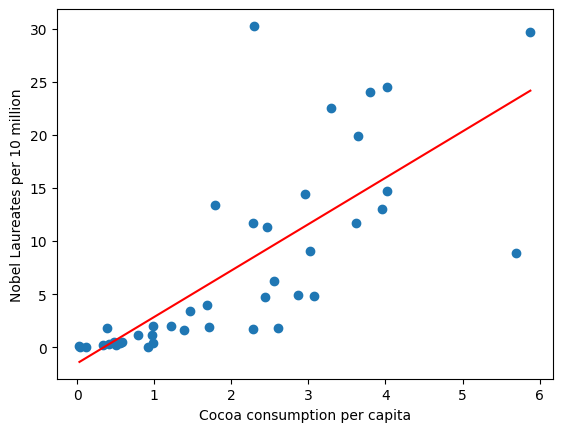

In [ ]:
# データ点の数
n = len(x)
# x の左隣に全部1の列ベクトルを付け足した行列
X = np.stack((np.ones(n),x),1)
# 係数行列 np.dot(X.T,X) , 定数ベクトル np.dot(X.T,y)
alp = la.solve(np.dot(X.T,X),np.dot(X.T,y))
print(alp)
# 直線にあてはめたyの値
yhat = np.dot(X,alp)
plt.scatter(x,y)
plt.plot(x,yhat,'r-')
plt.xlabel('Cocoa consumption per capita')
plt.ylabel('Nobel Laureates per 10 million')

傾きが、4.369 ということは、
「チョコレートの年間平均消費量が1kg多いと、10万人あたりのノーベル賞受賞者数が4.4人多くなる」ということを意味していますが、冒頭でも言ったように、これは<font color="red">相関であって因果関係ではない</font>ことに注意しましょう。
<font color="red">
「全国民がチョコレートをたくさん食べればノーベル賞受賞者が増える」わけではありません。
</font>

先程も述べたように、最小二乗法による線形回帰モデルは、`numpy.linalg`モジュールの`lstsq`関数を使って簡単に求めることができます。


In [ ]:
la.lstsq(X,y,rcond=None)

(array([-1.51800489,  4.36907945]),
 array([1374.91519723]),
 2,
 array([17.07870686,  3.57759304]))

## 回帰の誤差の評価

回帰結果の定量的な評価基準はいくつかありますが、今回は**二乗平均平方根誤差(root mean squared error:RMSE)** だけ紹介しておきます。$i$番目の目標変数の実際の値を$y_i$、回帰によって推定(予測)された値を$\hat{y}_i$とするとき、
RMSEは、
$$
\mbox{RMSE} = \sqrt{\frac{1}{n}\sum_{i=0}^{n-1} (y_i-\hat{y}_i)^2}
$$
で計算されます。ここで、(Eq.5-1)の残差二乗和と見比べてみると、両者の関係が、
$$
\mbox{RMSE} = \sqrt{\frac{Q(\boldsymbol{\alpha})}{n}}
$$
となっていることが分かります。

## 線形最小二乗法 2 : 重回帰
* 単回帰では、入力変数(説明変数)が1つだけでしたが、これを複数個($m$個)に拡張します($m \geq 2$)。
* $i$番目のデータ点(サンプル)を、$\boldsymbol{x}_i=[1,x_{i,1},x_{i,2},\cdots,x_{i,m}]$の<font color="red">行ベクトル</font>で表すとします。
  * 「なぜ、行ベクトルなのか？」「なぜ、変数ではない'1'が最初の要素として含まれているのか？」等の疑問があると思いますが、以下で説明するように、「そうすると都合が良いから」というのが主な理由です。
* 行ベクトルで表された各データサンプル$\boldsymbol{x}_i$を<font color="red">縦に積み重ねて</font>、次のような行列$\boldsymbol{X}$を作ります。
$$
\boldsymbol{X} =
\left[\begin{matrix}
\boldsymbol{x}_0 \\
\boldsymbol{x}_1 \\
\vdots \\
\boldsymbol{x}_{n-1}
\end{matrix}\right]
=
\left[\begin{matrix}
1 & x_{0,1} & \cdots & x_{0,m}\\
1 & x_{1,1} & \cdots & x_{1,m}\\
\vdots \\
1 & x_{n-1,1} & \cdots & x_{n-1,m}\\
\end{matrix}\right]
$$
* 出力変数データは、単回帰のときと同じように列ベクトルで表します。
$$
\boldsymbol{y} =
\left[\begin{matrix}
y_0 \\
y_1 \\
\vdots \\
y_{n-1}
\end{matrix}\right]
$$
* 求めたい関数$f_\boldsymbol{\alpha}(\boldsymbol{x})$は、次式のように表されます。
$$
f_\boldsymbol{\alpha}(\boldsymbol{x}_i) = \alpha_0 \cdot 1 + \alpha_1 \cdot x_{i,1} + \alpha_2 \cdot x_{i,2} + \cdots + \alpha_m \cdot x_{i,m} = \boldsymbol{\alpha} \cdot \boldsymbol{x}_i = \boldsymbol{x}_i \boldsymbol{\alpha}
$$
  * ここで、$\boldsymbol{\alpha}=[\alpha_0,\alpha_1,\cdots, \alpha_m]^\top$ は未知パラメータのベクトルです。
  * 最右辺の$\boldsymbol{x}_i \boldsymbol{\alpha}$は、<font color="red">行ベクトルと列ベクトルの行列積</font>です。

* このとき、重回帰での残差二乗和$Q(\boldsymbol{\alpha})$は、次のようになります。
$$
\begin{align}
Q(\boldsymbol{\alpha}) &= \sum_{i=0}^{n-1} \vert y_i - f_\boldsymbol{\alpha}(\boldsymbol{x}_i) \vert^2 = \sum_{i=0}^{n-1} \vert y_i - \boldsymbol{x}_i \boldsymbol{\alpha} \vert^2 \\
&= \Vert \boldsymbol{y} - \boldsymbol{X} \boldsymbol{\alpha} \Vert^2
= \left( \boldsymbol{y} - \boldsymbol{X} \boldsymbol{\alpha}\right)^\top
\left( \boldsymbol{y} - \boldsymbol{X} \boldsymbol{\alpha}\right) \\
&= \boldsymbol{y}^\top\boldsymbol{y} - 2 \boldsymbol{\alpha}^\top \boldsymbol{X}^\top\boldsymbol{y}+\boldsymbol{\alpha}^\top \boldsymbol{X}^\top \boldsymbol{X}
\boldsymbol{\alpha}\end{align}
$$
* これが最小になるような$\boldsymbol{\alpha}$を求めたいわけですが、第１項には$\boldsymbol{\alpha}$が含まれていないこと、および、行列・ベクトルの微分公式:
$$
\frac{\partial \boldsymbol{a}^\top \boldsymbol{b} }{\partial \boldsymbol{a}} = \boldsymbol{b},
\hspace{10mm}
\frac{\partial \boldsymbol{a}^\top \boldsymbol{B} \boldsymbol{a}}{\partial \boldsymbol{a}} = \left( \boldsymbol{B}+\boldsymbol{B}^\top \right) \boldsymbol{a}
$$
を用いれば、<font color="blue">$Q(\boldsymbol{\alpha})$の極値条件</font>は次のようになります。
$$
\frac{\partial Q(\boldsymbol{\alpha}) }{\partial \boldsymbol{\alpha}} = - 2 \boldsymbol{X}^\top\boldsymbol{y}+2 \boldsymbol{X}^\top \boldsymbol{X} \boldsymbol{\alpha}= \boldsymbol{0} \\
\therefore \boldsymbol{X}^\top \boldsymbol{X} \boldsymbol{\alpha}=\boldsymbol{X}^\top\boldsymbol{y} \\
\therefore \hat{\boldsymbol{\alpha}} = \left( \boldsymbol{X}^\top \boldsymbol{X} \right)^{-1}\boldsymbol{X}^\top\boldsymbol{y}
$$

* 単回帰のときにも言及しましたが、一般には極値が必ずしも最小値になるとは限りませんが、この場合は、$\boldsymbol{X}^\top \boldsymbol{X}$が正定になり、極値が最小値になることが保証されます。
* 実際のデータから、<font color="blue">行列$\boldsymbol{X}$, ベクトル$\boldsymbol{y}$を作ってしまえば、Numpyで容易に重回帰の最小二乗解$\hat{\boldsymbol{\alpha}}$を求めることができます。</font>



## [例題]ココアとコンタクトレンズと、ノーベル賞受賞者数

チョコレート（ココア）以外にも、製品の消費量が10万人あたりのノーベル賞受賞者数と相関が高いものが無いか、調べてみましょう。
ネット上の統計データを集めて、`nobel_and_others.csv`というCSVファイルを作ったので、まず、これをPandasで読み込んで表示します。

特に深い意味はありませんが、今回は国名の列をインデクスに指定しています。


In [ ]:
dfnobel = pd.read_csv('/content/drive/My Drive/nobel_and_others.csv',index_col='country')
display(dfnobel)

,nobel,chocolate,cocoa,alcoholic,cheese,cigarettes,contact_lenses,footwear,leather_footwear,small_appliances,snack,tea,wine
country,,,,,,,,,,,,,
SaintLucia,111.317,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Luxembourg,33.880,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Switzerland,32.771,8.8,5.88,91.72,22.2,1088.39,6.61,5.29,3.13,0.76,4.13,0.97,42.8
Sweden,30.052,6.6,2.29,79.60,20.5,567.65,5.31,3.07,0.71,0.73,5.44,0.64,27.2
Iceland,29.605,NaN,NaN,NaN,27.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
Mongolia,0.000,NaN,NaN,NaN,0.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Morroco,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.68,NaN
SaudiArabia,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.98,NaN


先程よりも、行数(国数)も列数(調査品目数)も増えていますが、統計値の無い（あるいは不明）な部分は欠損を表す`NaN` (not a number)という値が入っています。

Pandas の`DataFrame`の`corr()`メソッドは優秀で、そのような欠損を含んだデータに対しても適切に相関係数を計算してくれます。これを使って、単位人口当たりのノーベル賞受賞者数と、色々な品目の平均購買額との相関を求めてみると、次のようになりました。

In [ ]:
dfnobel.corr()

,nobel,chocolate,cocoa,alcoholic,cheese,cigarettes,contact_lenses,footwear,leather_footwear,small_appliances,snack,tea,wine
nobel,1.000000,0.647027,0.742515,0.345824,0.651838,-0.126495,0.728071,0.500403,0.353492,0.453558,0.268601,0.032399,0.226107
chocolate,0.647027,1.000000,0.799702,0.597864,0.620259,-0.172083,0.120194,0.456431,0.296174,-0.178284,0.182689,0.208896,0.288022
cocoa,0.742515,0.799702,1.000000,0.461854,0.645717,-0.067178,0.433285,0.618486,0.687819,0.120524,0.142183,-0.071009,0.249038
alcoholic,0.345824,0.597864,0.461854,1.000000,0.417697,0.425340,-0.106955,0.400208,0.100890,-0.223947,0.401347,0.229442,0.006925
cheese,0.651838,0.620259,0.645717,0.417697,1.000000,-0.074585,0.542324,0.243198,0.086924,0.121485,0.195690,-0.295483,0.709296
cigarettes,-0.126495,-0.172083,-0.067178,0.425340,-0.074585,1.000000,-0.377993,-0.205978,-0.216534,-0.376649,0.083742,-0.085527,0.217017
contact_lenses,0.728071,0.120194,0.433285,-0.106955,0.542324,-0.377993,1.000000,0.309817,0.423815,0.368134,-0.033721,0.000127,0.178306
footwear,0.500403,0.456431,0.618486,0.400208,0.243198,-0.205978,0.309817,1.000000,0.651084,0.603242,0.613010,0.329441,0.282883
leather_footwear,0.353492,0.296174,0.687819,0.100890,0.086924,-0.216534,0.423815,0.651084,1.000000,0.344280,0.228103,-0.027356,0.275238
small_appliances,0.453558,-0.178284,0.120524,-0.223947,0.121485,-0.376649,0.368134,0.603242,0.344280,1.000000,0.546208,0.089935,0.071971


In [ ]:
# ノーベル賞受賞者数と各品目購買金額との相関
print(dfnobel.corr().iloc[0,1:])

chocolate           0.647027
cocoa               0.742515
alcoholic           0.345824
cheese              0.651838
cigarettes         -0.126495
contact_lenses      0.728071
footwear            0.500403
leather_footwear    0.353492
small_appliances    0.453558
snack               0.268601
tea                 0.032399
wine                0.226107
Name: nobel, dtype: float64


視覚的にわかりやすいように、Matplotlibで棒グラフを描いてみます。

<BarContainer object of 12 artists>

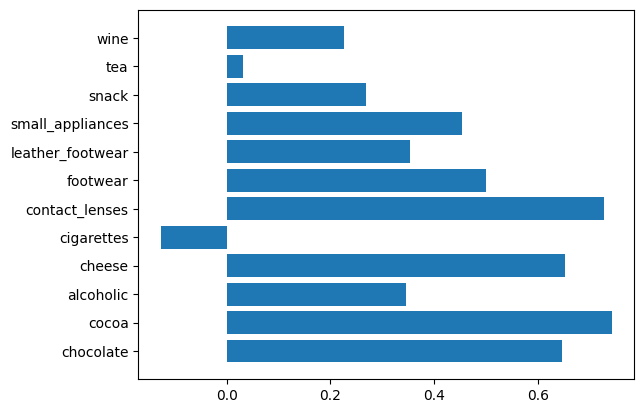

In [ ]:
plt.barh(dfnobel.columns[1:],dfnobel.corr().iloc[0,1:])

面白いことに、ココア・チョコレート以外にも、<font color="red">コンタクトレンズやチーズの消費量(購買量)がノーベル賞受賞者数と高い相関がある</font>ことが分かりました。

そこで、<font color="blue">国民平均のココア消費量と、コンタクトレンズ購買量の2つを入力変数(説明変数)、10万人あたりのノーベル賞受賞者数を出力変数(ターゲット変数)とする重回帰問題</font>を考えてみます。
  * 本当は上に挙げた全ての製品の消費量を説明変数に使いたかったのですが、データが全部揃っている国が少ないので、この2つに絞りました。

欧米23カ国の、単位人口当たりのノーベル受賞者数、ココア消費量、コンタクトレンズ購買額のデータを記した `nobel_cocoa_contactlense.csv`をPandasで読み込みます。

In [ ]:
dfccn = pd.read_csv('/content/drive/My Drive/nobel_cocoa_contactlense.csv',index_col='country')
display(dfccn)
dfccn.shape

,nobel,cocoa,contact_lenses
country,,,
Switzerland,32.771,5.88,6.61
Sweden,30.052,2.29,5.31
Austria,25.138,3.80,7.03
Denmark,24.329,3.29,8.39
Norway,24.284,4.02,7.04
UnitedKingdom,19.429,3.64,1.92
Ireland,14.572,4.02,4.23
Germany,13.527,3.96,2.09
Hungary,13.417,1.79,1.18


(23, 3)

3つの変量(ノーベル受賞者数、ココア消費量、コンタクトレンズ購買額)の間の相関行列は次のようになります。

In [ ]:
dfcor = dfccn.corr()
display(dfcor)

,nobel,cocoa,contact_lenses
nobel,1.000000,0.557087,0.675075
cocoa,0.557087,1.000000,0.433285
contact_lenses,0.675075,0.433285,1.000000


この23か国に限れば、コンタクトレンズの平均購買額の方がより単位人口あたりのノーベル受賞者数との相関が高くなっています。

3変量の2つずつをx,y軸に取ってプロットした散布図は次のようになります。

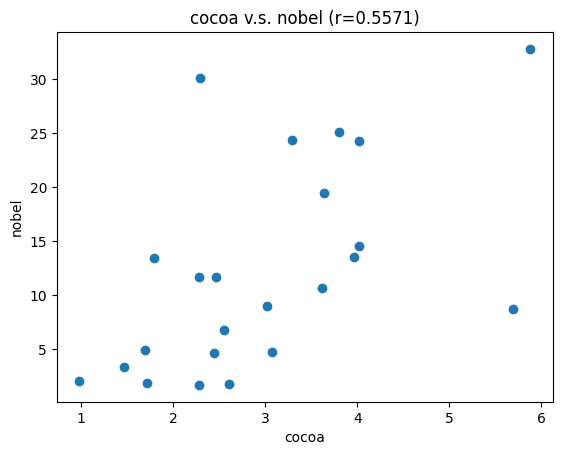

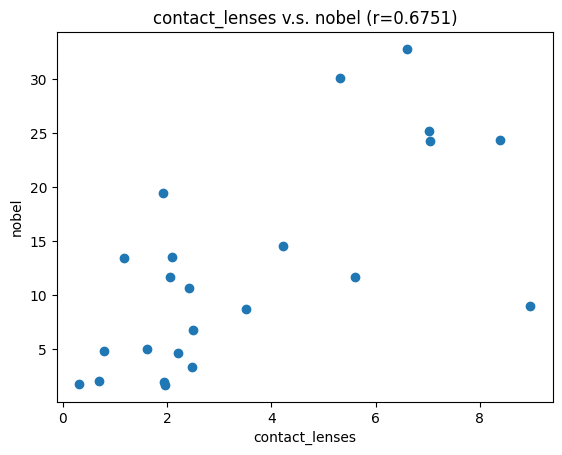

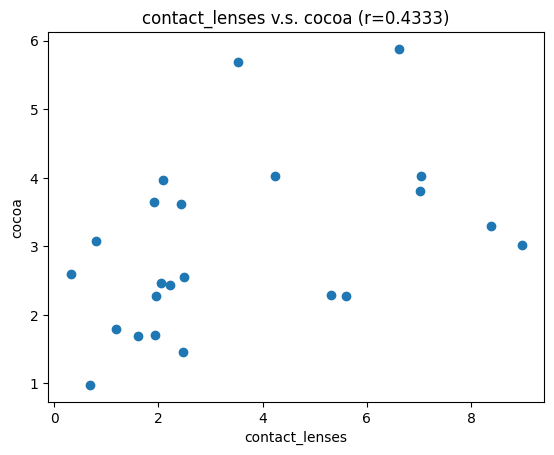

In [ ]:
for y in dfccn.columns[:-1]:
  for x in dfccn.columns[1:]:
    if x != y:
      plt.figure()
      plt.scatter(dfccn[x],dfccn[y])
      plt.title("{:s} v.s. {:s} (r={:.4f})".format(x,y,dfcor.loc[x,y]))
      plt.xlabel(x)
      plt.ylabel(y)

それでは、行列$\boldsymbol{X}$, ベクトル$\boldsymbol{y}$を作って重回帰を行います。

pandas の DataFrame の `values`属性を使えば、DataFrameオブジェクトに含まれているデータを、NumPyの行列・ベクトル(ndarray)オブジェクトとして取り出すことができます。

In [ ]:
#dfccn[['cocoa','contact_lenses']].values
dfccn.iloc[:,1:].values

array([[5.88, 6.61],
       [2.29, 5.31],
       [3.8 , 7.03],
       [3.29, 8.39],
       [4.02, 7.04],
       [3.64, 1.92],
       [4.02, 4.23],
       [3.96, 2.09],
       [1.79, 1.18],
       [2.46, 2.06],
       [2.28, 5.61],
       [3.62, 2.43],
       [3.02, 8.97],
       [5.69, 3.52],
       [2.55, 2.5 ],
       [1.69, 1.61],
       [3.07, 0.8 ],
       [2.44, 2.22],
       [1.46, 2.47],
       [0.98, 0.69],
       [1.71, 1.94],
       [2.6 , 0.32],
       [2.28, 1.96]])

In [ ]:
# ターゲット変数のデータ をベクトル y に
y = dfccn['nobel'].values
# サンプルの数
n = len(y)
# 説明変数のデータに値1の列を付け足したものを行列Xに
X = np.hstack((np.ones((n,1)),dfccn[['cocoa','contact_lenses']].values))
# 最小二乗法で係数ベクトルを求める
alp = la.solve(np.dot(X.T,X),np.dot(X.T,y))
print('alpha = ',alp)

alpha =  [-2.09324734  2.49462174  1.96084443]


In [ ]:
np.dot(la.inv(np.dot(X.T,X)),np.dot(X.T,y))

array([-2.09324734,  2.49462174,  1.96084443])

求まったパラメータの値は、
$$
\hat{\boldsymbol{\alpha}}=[\hspace{8mm}\underbrace{-2.09}_{切片},\hspace{8mm}  \underbrace{2.49}_{ココア係数},\hspace{2mm}  \underbrace{1.96}_{コンタクトレンズ係数} ]^\top
$$
です。このパラメータ値を使った予測値$\hat{\boldsymbol{y}}$を再現して、残差二乗和$Q(\hat{\boldsymbol{\alpha}})$と、平均平方二乗誤差(RMSE)を計算してみます。

残差二乗和: 909.4919058937219
RMSE: 6.28833255666439


Text(0, 0.5, 'y')

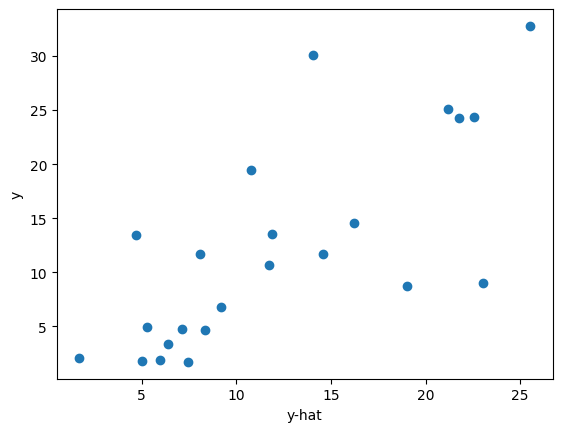

In [ ]:
# y-hat
yhat = np.dot(X,alp)
# 残差二乗和
Q = np.sum((y-yhat)**2)
print('残差二乗和:',Q)
# RMSE
rmse = np.sqrt(Q/n)
print('RMSE:',rmse)

# y-hat v.s. y
plt.scatter(yhat,y)
plt.xlabel('y-hat')
plt.ylabel('y')

## 変数のスケーリング（正規化、標準化）

今回扱った例題では問題になりませんでしたが、重回帰タスクでは、しばしば、与えられたデータにおいて<font color="red">異なる変数同士で値の範囲が著しく異なる場合があります。そのような場合、最小二乗法による計算が不安定になったり、得られた各パラメータ（回帰係数）を比較して説明変数の重要度を評価することが困難になる</font>、などの問題が生じます。

そのような場合には、<font color="blue">変数ごとに値のスケーリングを行い、各変数の値の範囲が概ね同じくらいになるようにデータを前処理する</font>ことがあります。
* (注意) 当たり前ですが、定数項(切片)の推定のために付け足したオール1の列（ダミー変数）はスケーリングしません（してはいけません）。

特によく行われるのは、次の２種類の線形スケーリングです。
1. 各変数ごとに、最小値が0に、最大値が1になるように線形スケーリングする(正規化(normalization))。
2. 各変数ごとに、平均が0、標準偏差が1になるように線形スケーリングする(標準化(standardization))。

先程の例題の2つの説明変数(ココア購入額、コンタクトレンズ購入額)について、正規化をしてみたのが以下の例になります。


In [ ]:
# もとの２変数の最小値、最大値
minv = np.min(X[:,1:],axis=0)
print("min (original):",minv)
maxv = np.max(X[:,1:],axis=0)
print("max (original):",maxv)
# 正規化 (0-1スケーリング)
Xno = (X[:,1:]-minv)/(maxv-minv)
print("min (normalized):",np.min(Xno,axis=0))
print("max (normalized):",np.max(Xno,axis=0))


min (original): [0.98 0.32]
max (original): [5.88 8.97]
min (normalized): [0. 0.]
max (normalized): [1. 1.]


このコードで、
```
Xno = (X[:,1:]-minv)/(maxv-minv)
```
のところで、`X[:,1:]`は$n \times 2$の行列(2次元array)、`minv`,`maxv`はともに2次元のベクトル(1次元array)なので、`X[:,1:]-minv`は変に見えるかもしれませんが、この場合、`X[:,1:]`の各行ごとに`minv`が引かれます。同様に、各行ごとに`maxv-minv`の要素商が計算されます。

**(練習)** `X[:,1:]`の各列を標準化(平均0,分散1)してください。

# 今回の小課題(HW2023-02)

詳細は [課題のノートブック(HW2023-02.ipynb)](https://colab.research.google.com/drive/12dWNYwjvGWe8Sdzh3N3c4uGB83KCsaic?usp=sharing)を見てください。

# おわりに

次回は、線形回帰における過剰適合(overfitting)の問題とその対策について話をする予定です。